<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°04


## Problema 01

<img src="https://cdni.iconscout.com/illustration/free/thumb/free-sales-team-illustration-download-in-svg-png-gif-file-formats--business-pack-illustrations-1730192.png" width = "300" align="center"/>


El conjunto de datos, denominado `company_sales_data.csv`, recoge las ventas mensuales de distintos productos de una empresa, ofreciendo una visión general de las unidades vendidas y los beneficios generados. Entre los productos incluidos se encuentran cremas faciales, jabones de baño y artículos para el cuidado capilar. Este conjunto de datos es útil para analizar el rendimiento de ventas y el comportamiento del mercado a lo largo del tiempo.

### Descripción de los Datos:

1. **month_number**: Número correspondiente al mes del año (1 para enero, 2 para febrero, etc.).
2. **facecream**: Cantidad de unidades de crema facial vendidas durante el mes.
3. **facewash**: Cantidad de unidades de limpiador facial vendidas durante el mes.
4. **toothpaste**: Cantidad de unidades de pasta de dientes vendidas durante el mes.
5. **bathingsoap**: Cantidad de unidades de jabón de baño vendidas durante el mes.
6. **shampoo**: Cantidad de unidades de champú vendidas durante el mes.
7. **moisturizer**: Cantidad de unidades de crema hidratante vendidas durante el mes.
8. **total_units**: Total de unidades vendidas de todos los productos en un mes dado.
9. **total_profit**: Ganancia total obtenida por la venta de todos los productos durante el mes, expresada en la moneda correspondiente.



In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,8)})

In [47]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/company_sales_data.csv")
df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


El **objetivo principal** es extraer la mayor cantidad de información posible de este conjunto de datos. Para lograrlo, se deben abordar las siguientes tareas. Para cada pregunta, deberá obtener una conclusión basada en los gráficos generados. Al finalizar todas las preguntas, se espera una conclusión general del análisis.

> **Nota:** Se permite el uso de las librerías Matplotlib o Seaborn para la visualización y análisis de los datos.




1. Lea la columna **`total_profit`** correspondiente a todos los meses y represente los datos utilizando un gráfico lineal y un gráfico de dispersión.


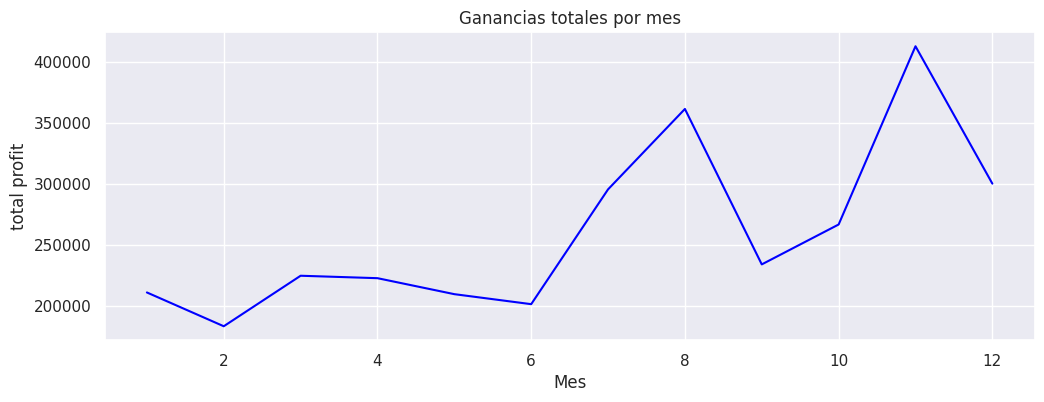

In [20]:
# total_profit

df_new1 = df.loc[:,['month_number','total_profit']]
plt.figure(figsize=(12, 4))
sns.lineplot(
    data = df_new1,
    x='month_number',
    y='total_profit',
    color = 'blue'
)
plt.xlabel('Mes')
plt.ylabel('Ganancias totales')
plt.title('Ganancias totales por mes')

plt.show()

**Conclusiones:** El peack de ganancias totales se encuentra al rededor del mes 11. En el segundo semestre las ganancias empiezan a aumentar, a pesar de que en el primero sean más bajas.

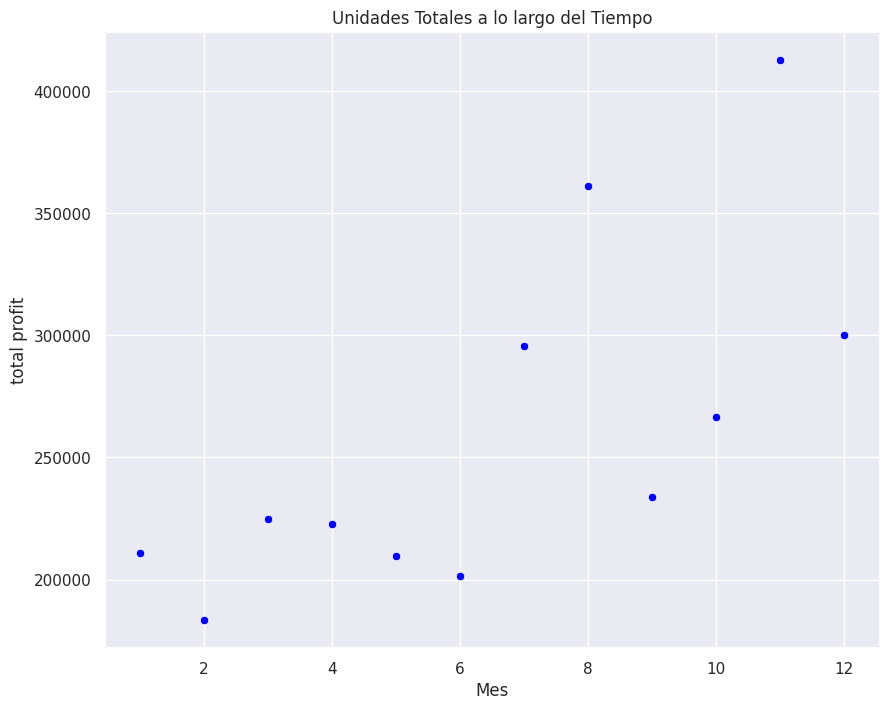

In [19]:
# gráfico de dispersión
sns.scatterplot(
    data = df_new1,
    x='month_number',
    y='ganancias totales',
    color = 'blue'
)

plt.xlabel('Mes')
plt.ylabel('total profit')
plt.title('Ganancias totales por mes')

plt.show()

**Conclusiones** Es más comodo verlo en un gráfico de lineas. Sin embargo esto nos permite ver los puntos exactos por mes.

2. Lea los datos de ventas de todos los productos y represéntelos en un gráfico de líneas múltiples.


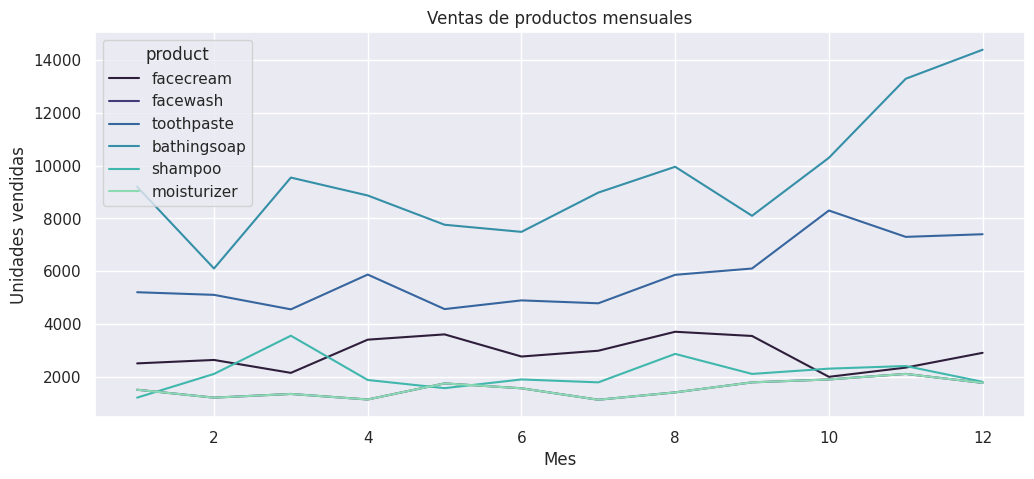

In [74]:
# Todos los datos graficados al mismo tiempo.
df_ventas = df.loc[:,['month_number','facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer','total_units']]
df_ventas = df_ventas.melt(
    id_vars=['month_number'],   # Mantener la columna 'month_number' fija
    value_vars=['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer'],  # Las columnas de productos
    var_name='product',         # Nombre de la nueva columna con los nombres de productos
    value_name='units_sold'     # Nombre de la columna con las unidades vendidas
)
df_ventas
plt.figure(figsize=(12, 5))  # Definir el tamaño de la figura
sns.lineplot(
    data = df_ventas,
    x='month_number',
    y='units_sold',
    hue='product',
    palette = "mako"
)
plt.xlabel('Mes')
plt.ylabel('Unidades vendidas')
plt.title('Ventas de productos mensuales')

plt.show()


**Conclusiones:** En todo el año lo más vendido fue la pasta de dientes y lo menos vendido fue el hidratante y, por el mes 5, el shampoo. La gente cuida su higiene dental todo el año, pero no le da tanta importancia al cuidado de la piel y tiende a bañarse menos en invierno.

3. Lea los datos de ventas de **`facecream`** y **`facewash`** y represéntelos utilizando un gráfico de barras.

<ipython-input-103-dcb3f5f9b5d7>:10: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(


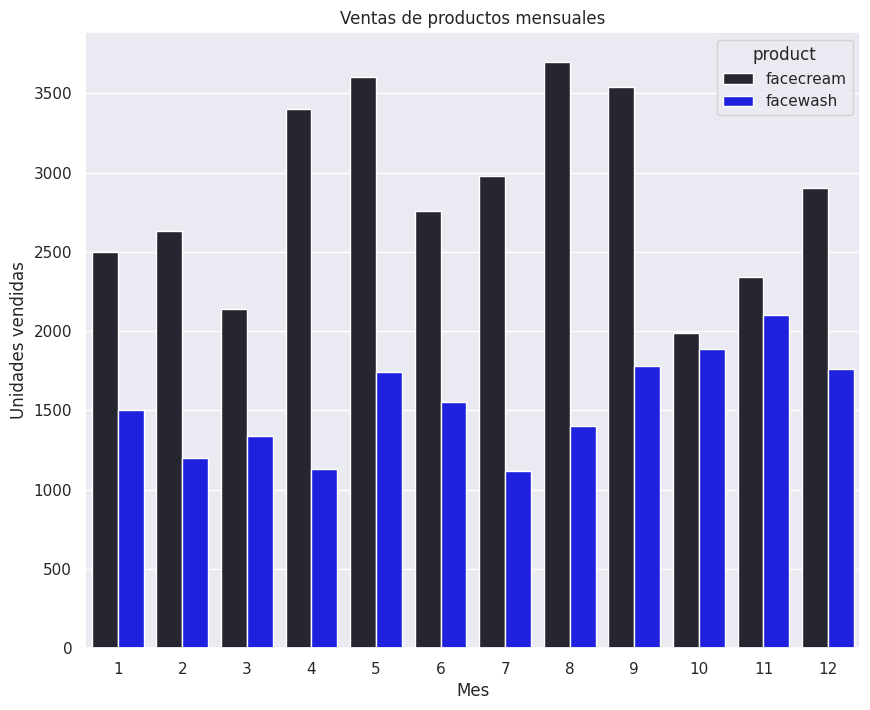

In [103]:
# FIXME
df_face = df.loc[:,['month_number','facecream','facewash','total_units']]
df_face = df_face.melt(
    id_vars=['month_number'],   # Mantener la columna 'month_number' fija
    value_vars=['facecream', 'facewash'],  # Las columnas de productos
    var_name='product',         # Nombre de la nueva columna con los nombres de productos
    value_name='units_sold'     # Nombre de la columna con las unidades vendidas
)
df_face
sns.barplot(
    data = df_face,
    x='month_number',
    y='units_sold',
    hue='product',
    color = 'blue'
)
plt.xlabel('Mes')
plt.ylabel('Unidades vendidas')
plt.title('Ventas de productos mensuales')

plt.show()

**Conclusiones:** En productos faciales, se prefiere las cremas para la cara.

4. Lea los datos de ventas de todos los productos y represéntelos utilizando un gráfico de caja (*box-plot*).


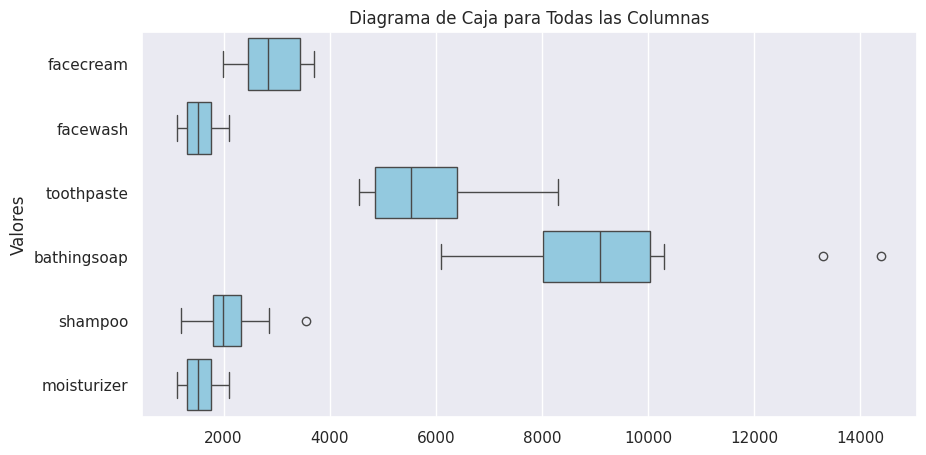

In [108]:
# Box-plot
df_new= df.loc[:,['facecream','facewash','toothpaste','bathingsoap','shampoo','moisturizer']]
plt.figure(figsize=(10, 5))  # Definir el tamaño de la figura
sns.boxplot(data=df_new, color='skyblue',orient='h')

# Personalizar el gráfico
plt.xlabel('')
plt.ylabel('Valores')
plt.title('Diagrama de Caja para Todas las Columnas')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()

5. Calcule las ventas totales del año pasado para cada producto y represéntelas utilizando un gráfico circular.

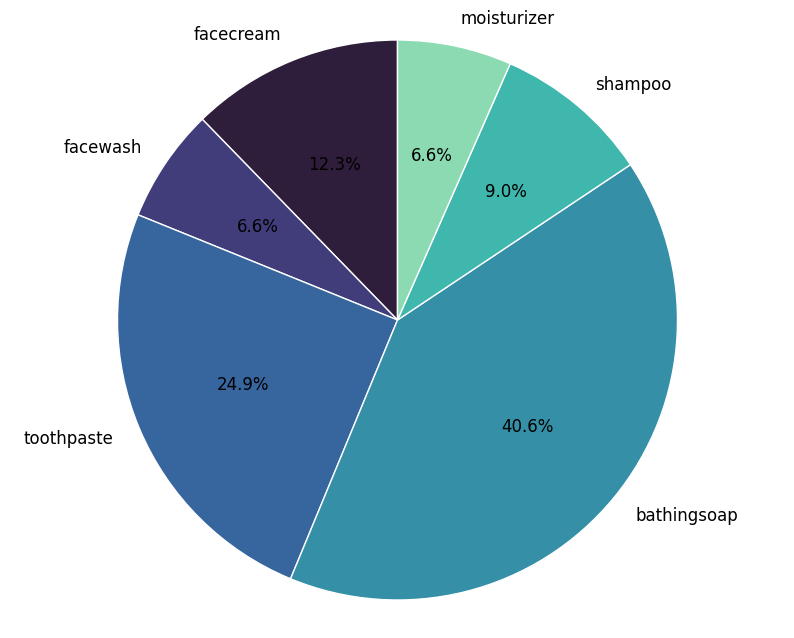

In [136]:
# Grafico circular
df_ventas_mes = df.loc[:,['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer','total_profit']]

# Extraer los valores y los nombres de los productos
ventas = df_ventas_mes['total_profit']  # Valores de ventas del mes 1
productos = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']  # Nombres de los productos

df_ventas_mes
ventas = df_ventas_mes[['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']].sum()  # Suma total de cada producto
productos = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']  # Nombres de los productos

# Crear el gráfico circular
plt.pie(ventas,
        labels=productos,
        autopct='%1.1f%%',  # Muestra porcentajes
        startangle=90,
        colors=sns.color_palette('mako'),
        textprops={'color': 'black', 'fontsize': 12})  # Usa la paleta de colores de Seaborn

# Asegurar que el gráfico sea circular
plt.axis('equal')

# Mostrar el gráfico
plt.show()

**Conclusiones:** En todo el año, lo más vendido fue el jabón de baño, seguido de la pasta de dientes. Insumos básicos en la vida de las personas